<span style="font-size:x-large;">Lab 9</span>

## Health Risk Factors

In this lab we will investigate some relationships between health risk factors using data from the Australian Government's *[Australian Institute of Health and Welfare](https://www.aihw.gov.au)*. (AIHW)


### Data acquisition

Go to the AIHW website and navigate to Reports and Data > Behaviours and Risk factors. Notice that this site provides a range of information on the relationship between behaviours, such as smoking or physical activity, and health risk.

Follow the link to Risk Factors > Reports. Scroll down to "Risk factors to health" and open the report.

Here you will find further information on the five leading risk factors for ill-health. The 'Data' link provides the source data for the study.

* Download the Source Data tables

You should now have the file `risk-factors-2014-15-source-data.xls`.

Open the spreadsheet and inspect the table of contents. You should find the nine tables listed on the "Risk factors to health" report website.

Save the spreadsheet in `.xslx` format, and upload it to the Health lab directory in CoCalc.


### Reading the data into a `pandas` dataframe

We will investigate the data using `pandas`, beginning with the data on physical activity (Table 5). This time we'll take the data directly from the xlsx file (rather than using a 'flat file' format like csv as an interlingua).

As usual, it is suggested you start with some constants. We'll use the following:

In [1]:
SOURCE = "risk-factors-2014-15-source-data.xlsx"
TABLES = {3: "Table 3_Alcohol",
          4: "Table 4_Smoking",
          5: "Table 5_Physical activity",
          6: "Table 6_Dyslipidaemia",
         }

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df5 = pd.read_excel(SOURCE, sheet_name = TABLES[5], skiprows = 1, index_col = 0, skipfooter = 8)
df5.shape


(23, 3)

Open the [pandas API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) reference, and find Excel in the Input/Output listing.

* Use `read_excel()` to read in Table 5 using its sheet name, which you can get from the above TABLES dictionary. You should use other arguments to ensure that:
  * the first line is skipped over and the second line is used for the *column labels*
  * only the first 4 columns are included
  * the first (zeroth) column is used for the *index*
  * the notes at the bottom are excluded

Check the table shape, and use the `head()` function to view the table. It should contain the following data:
```
                             Men Women  Persons
Population characteristics                     
Age group (years)(a)(b)      NaN   NaN      NaN
18–24                       45.4  50.7     48.0
25–34                       43.9    49     46.5
35–44                       53.3  53.6     53.4
45–54                       56.8  56.2     56.6
55–64                         54  59.7     56.5
65+                         73.5  76.9     75.0
All persons (18–64)         50.6  53.7     52.2
All persons (18+)              —     —     56.4
Remoteness(a)                NaN   NaN      NaN
Major cities                  47  52.4     49.7
Inner regional              59.1  56.7     57.9
Outer regional and remote   63.9  57.4     60.3
Socioeconomic status(a)      NaN   NaN      NaN
Q1 (most disadvantaged)     59.6  66.1     62.6
Q2                            59  54.1     56.7
Q3                          55.4  55.5     55.5
Q4                          44.4    51     47.3
Q5 (least disadvantaged)    37.7  42.6     40.0
Time series (c)(d)           NaN   NaN      NaN
2007–08                        —     —     49.1
2011–12                        —     —     45.3
2014–15                        —     —     44.3
```


In [3]:
df5 = df5.dropna()

df5

Men Women  Persons
Population characteristics                     
18–24                       45.4  50.7     48.0
25–34                       43.9    49     46.5
35–44                       53.3  53.6     53.4
45–54                       56.8  56.2     56.6
55–64                         54  59.7     56.5
65+                         73.5  76.9     75.0
All persons (18–64)         50.6  53.7     52.2
All persons (18+)              —     —     56.4
Major cities                  47  52.4     49.7
Inner regional              59.1  56.7     57.9
Outer regional and remote   63.9  57.4     60.3
Q1 (most disadvantaged)     59.6  66.1     62.6
Q2                            59  54.1     56.7
Q3                          55.4  55.5     55.5
Q4                          44.4    51     47.3
Q5 (least disadvantaged)    37.7  42.6     40.0
2007–08                        —     —     49.1
2011–12                        —     —     45.3
2014–15                        —     —     44.3

The "subheadings" in the spreadsheet (such as **Age group (years)**) are just string data. They can be distinguished in our pandas table by the fact that the data fields contain `np.NaN`.

* Find the pandas API "Missing data handling" section for Dataframes, and use `dropna()` to drop the subheading rows (those with `NaN` in them).

Check that the change in shape is what you expect.

Your table should now begin with:
```
                             Men Women  Persons
Population characteristics                     
18–24                       45.4  50.7     48.0
25–34                       43.9    49     46.5
35–44                       53.3  53.6     53.4
45–54                       56.8  56.2     56.6
55–64                         54  59.7     56.5
65+                         73.5  76.9     75.0
All persons (18–64)         50.6  53.7     52.2
All persons (18+)              —     —     56.4
Major cities                  47  52.4     49.7
Inner regional              59.1  56.7     57.9
...
```

In [4]:
df5.dtypes

Men         object
Women       object
Persons    float64
dtype: object

* Use the Dataframe's `dtypes` attribute to check the data types of your data columns.

What do you notice? Why has this occurred?

* Read the table in again using `read_excel`. This time set the parameter `na_values='-'`.

In [5]:
# Treat '-' as NAN

df5 = pd.read_excel(SOURCE, sheet_name = TABLES[5],
                    skiprows = 1, index_col = 0, skipfooter = 8, na_values = '-')

df5 = df5.dropna()

df5.shape

(19, 3)

What do you notice?

There are many kinds of dashes in Unicode, and its very difficult to tell from looking at it what kind of dash the spreadsheet has used.

* Use Dataframe's `loc()` method to extract one of the dashes from your table. (Print it to make sure.)
* Use python's `ord()` method to find the Unicode number of the character you extracted from the table. What is its Unicode number?
* To check, use python's `chr()` method to convert the Unicode number back into a character.

In [6]:
# Extract one of the dash to see what the type is
df5_edit = df5.loc["2007–08", "Men"]

ord_v = ord(df5_edit)
ord_v  #8212

# chr_v = chr(ord_v)
# chr_v

# Now we know the unicode number of the character "-": 8212

8212

In [7]:
# na_values is used to treat the special char as NAN

dash = 8212

df5 = pd.read_excel(SOURCE, sheet_name = TABLES[5],
                    skiprows = 1, index_col = 0,
                    skipfooter = 8, na_values = chr(dash))

# Remove the line whose elements are all NAN
df5 = df5.dropna(how = "all")

df5

Men  Women  Persons
Population characteristics                      
18–24                       45.4   50.7     48.0
25–34                       43.9   49.0     46.5
35–44                       53.3   53.6     53.4
45–54                       56.8   56.2     56.6
55–64                       54.0   59.7     56.5
65+                         73.5   76.9     75.0
All persons (18–64)         50.6   53.7     52.2
All persons (18+)            NaN    NaN     56.4
Major cities                47.0   52.4     49.7
Inner regional              59.1   56.7     57.9
Outer regional and remote   63.9   57.4     60.3
Q1 (most disadvantaged)     59.6   66.1     62.6
Q2                          59.0   54.1     56.7
Q3                          55.4   55.5     55.5
Q4                          44.4   51.0     47.3
Q5 (least disadvantaged)    37.7   42.6     40.0
2007–08                      NaN    NaN     49.1
2011–12                      NaN    NaN     45.3
2014–15                      NaN    NaN     44.3

We can now read in the table again.

* Use `read_excel` to read in Table 5, but this time set `na_values` to the correct character.

*Hint: You will need to use `chr()`*.
    
Have a look at your dataframe and ensure that the dashes have been replaced by NaN.

* Once again use `dropna()` to remove the 'subheader' rows. However this time use '`how`' to ensure that only the correct rows are removed (for example, the "All persons (18+)" row should not be removed)

Check the shape and the dtypes. Are they now what you would expect (the data should all be floats)? If not, ensure they are before proceeding.

In [8]:
df5.dtypes

Men        float64
Women      float64
Persons    float64
dtype: object

You may have used `skipfooter` to exclude the reference notes at the bottom of the table. This will not work well if we want to reuse (generalise) the code to work for other tables in the spreadsheet workbook.

* How else might the reference rows be removed?

*Hint: Very little coding needed.*

In [9]:
# General operation of removing the footer
# instead of using skipfooter

dash = 8212

df5 = pd.read_excel(SOURCE, sheet_name = TABLES[5],
                    skiprows = 1, index_col = 0, na_values = chr(dash))

# Remove the line whose elements are all NAN
# Here is how we remove the footer
#     because the line of footer are all NAN
#     so we can get rid of the notes from the table
df5 = df5.dropna(how = "all")

df5

Men  Women  Persons
Population characteristics                      
18–24                       45.4   50.7     48.0
25–34                       43.9   49.0     46.5
35–44                       53.3   53.6     53.4
45–54                       56.8   56.2     56.6
55–64                       54.0   59.7     56.5
65+                         73.5   76.9     75.0
All persons (18–64)         50.6   53.7     52.2
All persons (18+)            NaN    NaN     56.4
Major cities                47.0   52.4     49.7
Inner regional              59.1   56.7     57.9
Outer regional and remote   63.9   57.4     60.3
Q1 (most disadvantaged)     59.6   66.1     62.6
Q2                          59.0   54.1     56.7
Q3                          55.4   55.5     55.5
Q4                          44.4   51.0     47.3
Q5 (least disadvantaged)    37.7   42.6     40.0
2007–08                      NaN    NaN     49.1
2011–12                      NaN    NaN     45.3
2014–15                      NaN    NaN     44.3

#### Putting it together [1 lab mark]

* Write a function `load_and_clean(tablenum)` that takes a table number and returns a dataframe for that table with:
  * subheading rows removed
  * reference section removed
  * all data as `float64`

You should ensure this works on tables 3 to 6.

In [10]:
def load_and_clean(tablenum):

    df = pd.read_excel(SOURCE, sheet_name = tablenum,
                        skiprows = 1, index_col = 0, na_values = chr(8212))

    # The reference section will be removed in here.
    df = df.dropna(how = "all")

    return df

In [11]:
from nose.tools import assert_equal, assert_true

assert_equal(load_and_clean(5).shape, (19, 3))
assert_equal(load_and_clean(6).shape, (16, 3))
assert_equal(load_and_clean(5).dtypes["Women"], np.float64)
assert_true(np.isnan(load_and_clean(5).loc["All persons (18+)","Men"]))
assert_true(np.isclose(load_and_clean(5).iloc[-1]["Persons"],44.3))
print("So far, so good. Please continue with your own testing.")


So far, so good. Please continue with your own testing.


### Data selection and visualisation

* Extract the first 6 rows of the table into a new dataframe called `age_groups`.

Check that your new table is correct.

<AxesSubplot:xlabel='Population characteristics'>

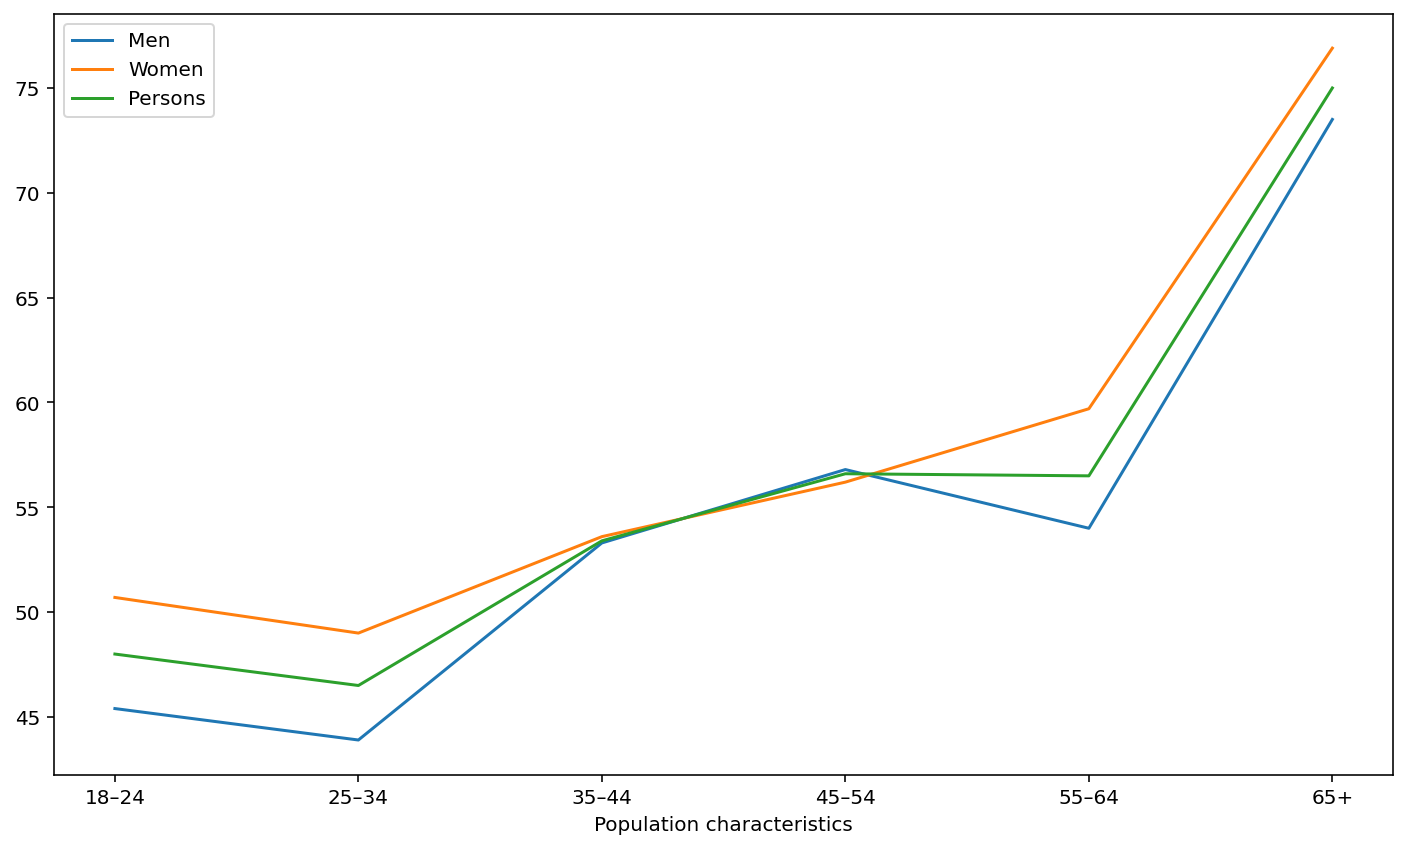

In [12]:
age_groups = df5.head(6)

age_groups.plot()

* Use the default `Dataframe.plot()` method on your `age_groups` dataframe and show the results.



You should find that there appears to be a strong relationship between age and "insufficient" physical activity.

Looking at the x-axis, it might also look at if the dataframe's plot method has worked out that the indices represent age groups on a number line. But don't be fooled!

We just got lucky! As far as pandas is concerned, they are just independent categories of some sort. It just happens they were in age order in the spreadsheet.

To verify this, let's see what happens when they're in a different order. Try:
```
age_groups2 = exercise.iloc[[0,1,2,5,4,3]]
```
where `exercise` is the cleaned Table 5.

Inspect the table and plot the corresponding plot.

<AxesSubplot:xlabel='Population characteristics'>

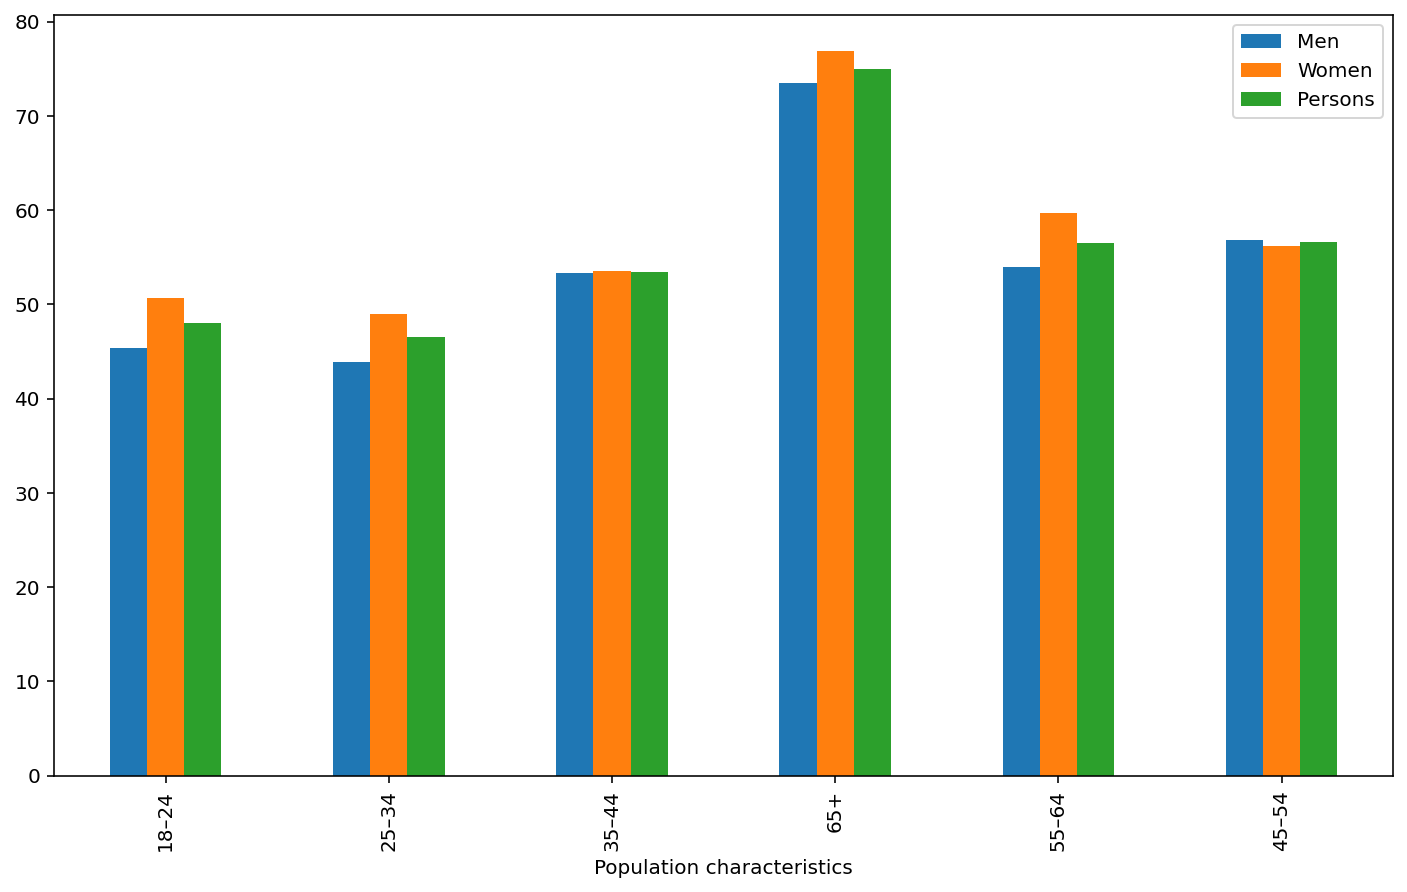

In [13]:
exercise = load_and_clean(TABLES[5])

age_groups2 = exercise.iloc[[0,1,2,5,4,3]]
age_groups2

# age_groups2.plot()
age_groups2.plot.bar()

You should see quite a different picture.

In fact, it's a bit misleading to plot our (categorical) age data as a line plot - the adjoining lines suggest relationships that don't exist. Better would be something like a bar chart.

* Repeat your original plot, this time using a bar chart.

Notice how much easier it is with this kind of data than using matplotlib to do the bar chart directly.

### Creating a numerical values from the index

While the above line plot was not the best way to look for relationships, we would like to ascertain whether we can quantitatively establish a relationship between age and physical activity.

To do this, we will convert the index values into numerical values and add them to our table in an extra column.

The first thing we need to do is get the index.

* Get the index using the '`index`' attribute.

What kind of object does it return?

What kind of object is the first element of the index?


For our numerical values, we'll use the midpoint of the age ranges.

For 65+ we know that the data spread will be much wider than the previous categories. For such categories we will adopt a policy of setting the 'midpoint' to 10 more than the start of the last category (75 in this case). This is highly unsatisfactory! (Once again it is not clear why they have simply ignored age categories from 65 upwards - don't be responsible for this kind of agism!)

Note: If we had a model of population against age we could compensate to some extent by selecting the medians for each category from the model to give us a better result.

To find the midpoints we'll need to parse the age categories. This time we'll do it more elegantly - using regular expressions!

In [14]:
# The attribute index of the data frame

age_groups.index

Index(['18–24', '25–34', '35–44', '45–54', '55–64', '65+'], dtype='object', name='Population characteristics')

### Regular expressions

We'll use a regular expression to extract the numbers so we can calculate the medians. 

* Import the '`re`' library, and try the following code (where `exercise` is the name of the dataframe):
    
```
m = re.match('(\d+)'+chr(8211)+'(\d+)', exercise.index[0])
(m.group(0), m.group(1), m.group(2))
```

You're not expected to remember the regular expression language, but read through the [`re` library documentation](https://docs.python.org/3/library/re.html) and see if you can identify how this works and what each piece does.


In [15]:
import re


m = re.match('(\d+)'+chr(8211)+'(\d+)', exercise.index[0])
(m.group(0), m.group(1), m.group(2))

('18–24', '18', '24')

* Try writing a regular expression that matches the "65+" category (and only the "65+" category).
* Generalise this to an expression that matches:
  * any two digits followed by '+'.
  * one or more digits followed by a '+'.

Check that your regular expression finds a match on line 5, but not on line 4.

In [16]:
m1 = re.match('^(\d+)\+', exercise.index[5])
(m1.group(0), m1.group(1))

('65+', '65')

#### Adding a new column

One way to add a new column to our dataframe is to create the column as a `Series` and then add it using the `assign()` method.

A *Series* is like a 1-dimensional version of a dataframe. You can think of each dataframe column, for example, as a series. A series shares many of the same methods as a dataframe.

There is a second benefit to using a series - we can use its `apply()` method (like we did for dataframes in the lectures) to apply our regular expression to all the elements of the index.

Look at the API for `Index` objects.

* Find the method for converting an Index to a Series, read the documentation, and convert the index of Table 5.

Have a look at the resulting series.

Note that the documentation states: "Create a Series with both index and values equal to the index keys." Can you see this in your result?


The following function converts (maps) an age category to a float representing the midpoint (or 10 higher, for an end range). Otherwise it returns NaN. Follow through the code to understand how it works.

In [17]:
def get_mid(astring):
    # in case the category is passed as a number
    thestring = str(astring)
    age_range = re.fullmatch('(\d+)'+chr(8211)+'(\d+)', thestring)
    end_range = re.fullmatch('^(\d+)\+', thestring)
    if age_range:
        return np.mean([int(age_range.group(1)), int(age_range.group(2))])
    elif end_range:
        return int(end_range.group(1))+10
    else:
        return np.NaN

# test
print(get_mid(exercise.index[0]))
print(get_mid(exercise.index[5]))
print(get_mid(exercise.index[6]))


21.0
75
nan


* Use Series' `apply()` method, along with the tools above, to create new series called 'mids' that contains the midpoints of the age categories, and `NaN` otherwise.

In [18]:
# Convert an index to a series object
# Now the series with both index and values equal to the index keys
mids = exercise.index.to_series(name = "Midpoints")

# And then use apply function to get the new series
mids = mids.apply(lambda x : get_mid(x))

mids

Population characteristics
18–24                          21.0
25–34                          29.5
35–44                          39.5
45–54                          49.5
55–64                          59.5
65+                            75.0
All persons (18–64)             NaN
All persons (18+)               NaN
Major cities                    NaN
Inner regional                  NaN
Outer regional and remote       NaN
Q1 (most disadvantaged)         NaN
Q2                              NaN
Q3                              NaN
Q4                              NaN
Q5 (least disadvantaged)        NaN
2007–08                      1007.5
2011–12                      1011.5
2014–15                      1014.5
Name: Midpoints, dtype: float64

In [19]:
ex_mids = exercise.assign(Midpoints = mids)
ex_mids

Men  Women  Persons  Midpoints
Population characteristics                                 
18–24                       45.4   50.7     48.0       21.0
25–34                       43.9   49.0     46.5       29.5
35–44                       53.3   53.6     53.4       39.5
45–54                       56.8   56.2     56.6       49.5
55–64                       54.0   59.7     56.5       59.5
65+                         73.5   76.9     75.0       75.0
All persons (18–64)         50.6   53.7     52.2        NaN
All persons (18+)            NaN    NaN     56.4        NaN
Major cities                47.0   52.4     49.7        NaN
Inner regional              59.1   56.7     57.9        NaN
Outer regional and remote   63.9   57.4     60.3        NaN
Q1 (most disadvantaged)     59.6   66.1     62.6        NaN
Q2                          59.0   54.1     56.7        NaN
Q3                          55.4   55.5     55.5        NaN
Q4                          44.4   51.0     47.3        NaN
Q5 (least disadvantaged)    37.7   42.6     40.0        NaN
2007–08                      NaN    NaN     49.1     1007.5
2011–12                      NaN    NaN     45.3     1011.5
2014–15                      NaN    NaN     44.3     1014.5

Why does our method also return values for the time series data at the end?

We could refine our regular expression to exclude those, however the values make sense, so we will leave them in.

Finally we can add the column using something like:
```
ex_mids = exercise.assign(Midpoints = mids)
```

* Try this and inspect the resulting dataframe.

It should now start like this:
```
                             Men Women  Persons  Midpoints
Population characteristics                                
18–24                       45.4  50.7     48.0       21.0
25–34                       43.9    49     46.5       29.5
35–44                       53.3  53.6     53.4       39.5
45–54                       56.8  56.2     56.6       49.5
55–64                         54  59.7     56.5       59.5
65+                         73.5  76.9     75.0       75.0
All persons (18–64)         50.6  53.7     52.2        NaN
All persons (18+)              —     —     56.4        NaN
...
```

### Filtering

Dataframe's `filter()` method allows us to get a subset of the dataframe using a regular expression on the index.

* Use `filter()` on the dataframe index to extract a new table, `ages`, that contains only the age ranges (from 18-24 through to 65+ in the case of Table 5).

Check that your table is correct. It should now contain:
```

                             Men Women  Persons  Midpoints
Population characteristics                                
18–24                       45.4  50.7     48.0       21.0
25–34                       43.9    49     46.5       29.5
35–44                       53.3  53.6     53.4       39.5
45–54                       56.8  56.2     56.6       49.5
55–64                         54  59.7     56.5       59.5
65+                         73.5  76.9     75.0       75.0
```

*Hint: You may find the `^` and `|` operators useful for this task.


In [20]:
filter_mids = ex_mids.filter(regex = '^(\d+)\+'+ '|' + '^(\d\d)'+chr(8211)+'(\d\d)',
                             axis = 0)
filter_mids

Men  Women  Persons  Midpoints
Population characteristics                                 
18–24                       45.4   50.7     48.0       21.0
25–34                       43.9   49.0     46.5       29.5
35–44                       53.3   53.6     53.4       39.5
45–54                       56.8   56.2     56.6       49.5
55–64                       54.0   59.7     56.5       59.5
65+                         73.5   76.9     75.0       75.0

### Visualising relationships

Now that we have numerical data for age groups and physical activity, we can again look for a relationship.

* Once again, use a slice to create a table with the first 6 rows.
* Use Dataframe's scatter plot to plot Persons (y) against the age midpoints (x).

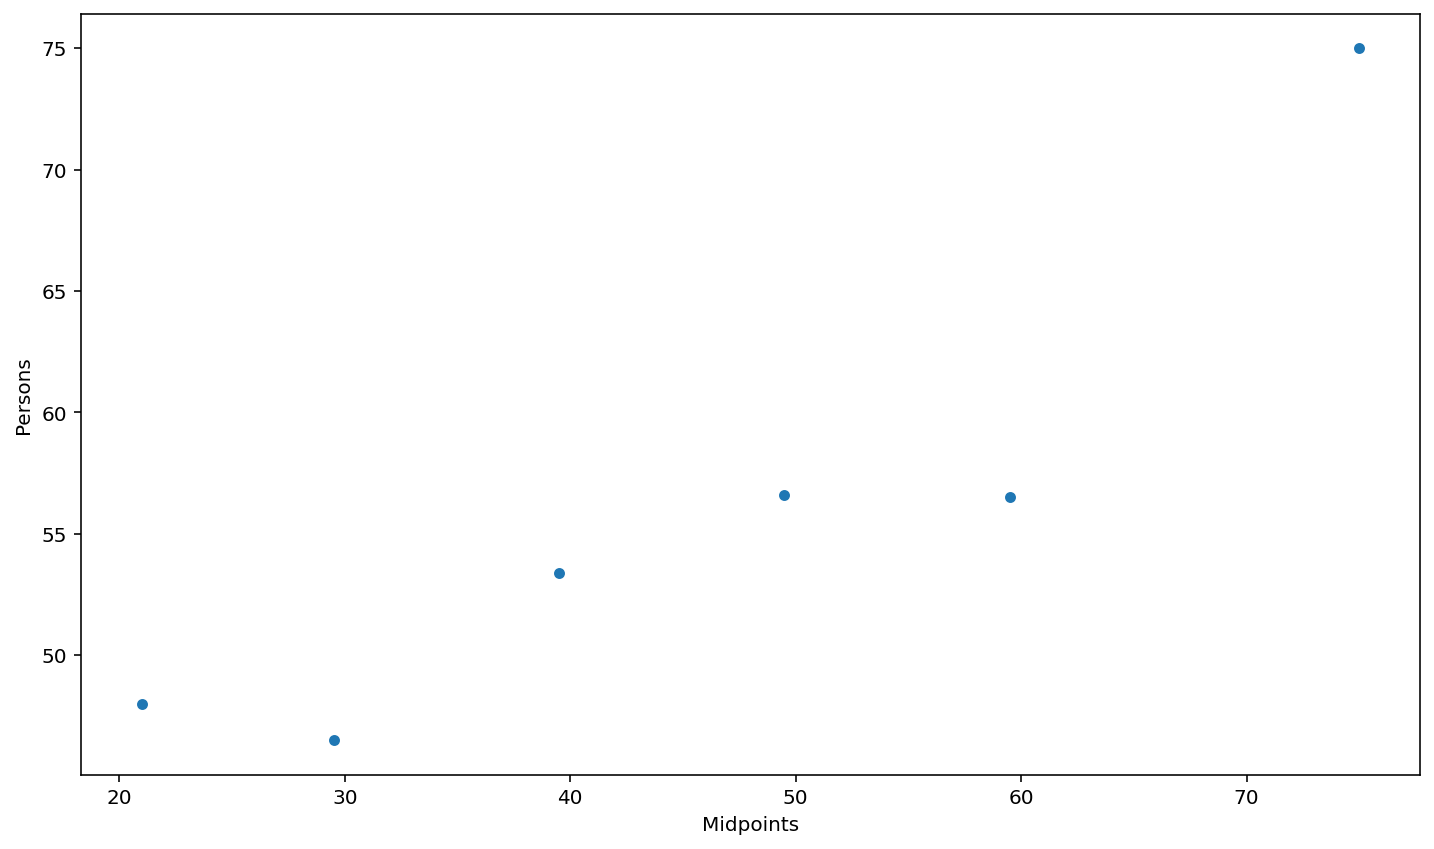

In [21]:
filter_mids.plot.scatter('Midpoints', 'Persons')
plt.show()

Does it look like there is a relationship?

* Repeat the plot, this time with a line plot.

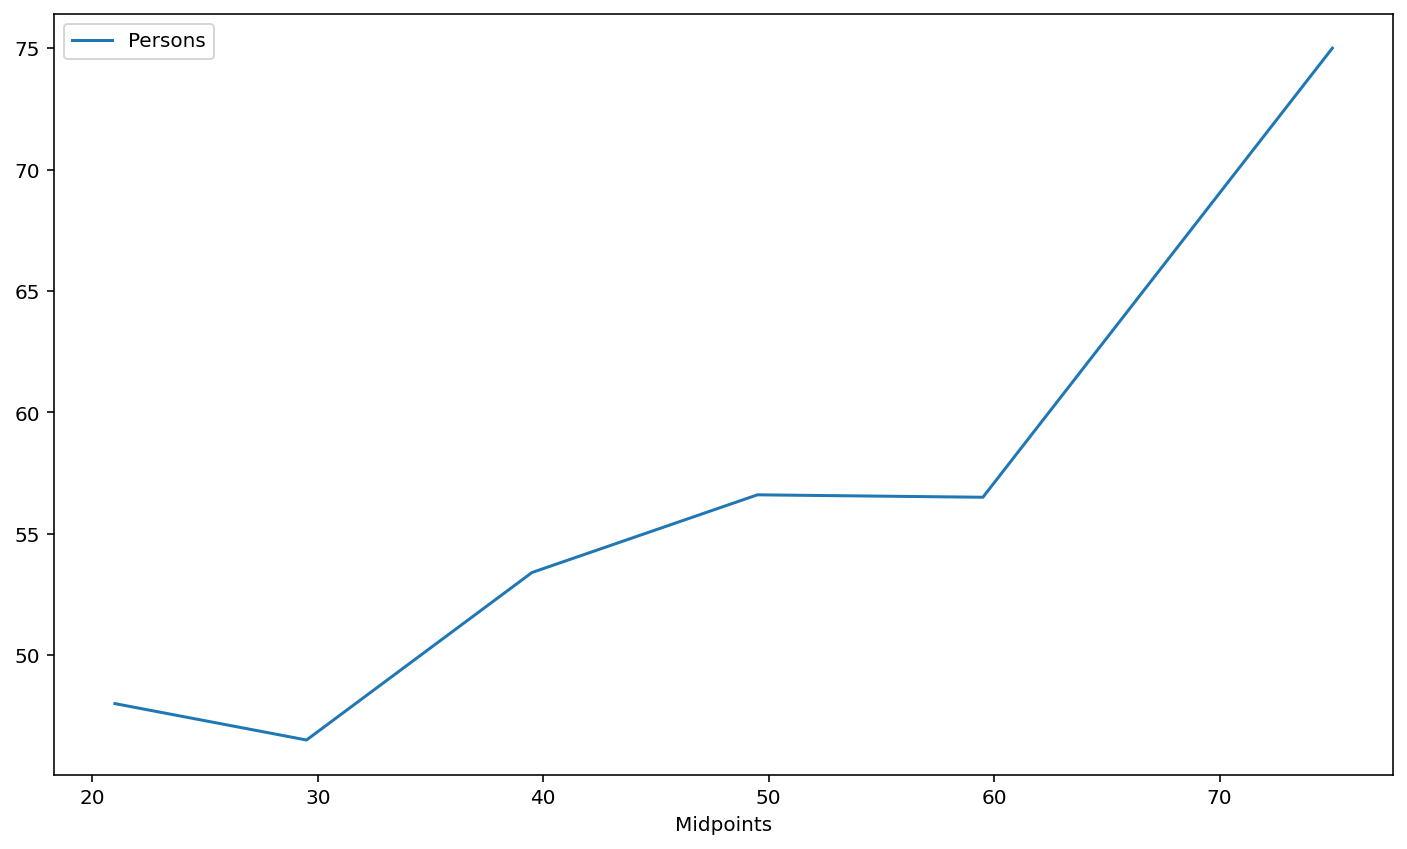

In [22]:
filter_mids.plot('Midpoints', 'Persons')
plt.show()

### Correlation

You will probably have come across correlations in your maths/statistics courses before. The most commonly used correlation is Pearson's correlation. A correlation coefficient nearing +1 indicates a very strong correlation. A correlation nearing -1 indicates a very strong inverse correlation. A correlation coefficient near zero suggests little or no correlation.

To make life easy, dataframes and series include some elementary statistics methods.

Dataframe's `corr()` method produces a correlation matrix of all numerical columns using Pearson's correlation by default.

* Calculate the correlation coefficient matrix for your 6-row table.

What is the correlation coefficient between Midpoints and Persons? How would you express your conclusion from this analysis.

In [23]:
correlation = filter_mids.corr()
correlation["Persons"]["Midpoints"]

0.9189906028438024

#### Putting it all together [1 lab mark]

* Write a function `age_correlation (tablenum, quiet=False)` which:
  * reads the clean data for Table `tablenum`
  * adds a column with "midpoints" for the age ranges (as specified above)
  * creates a new table with the age-range data only
  * generates the (Pearson) correlations for the table
  * returns the correlation between age and Persons

* If `quiet=False` then the function should also produce a "report" in which it:
  * prints an appropriate header for the report
  * prints the table with the age-range data
  * shows a line plot for the Persons, Women and Men against age, with appropriate title and axis labels
  * prints the correlation matrix
  
Your function should work correctly for any of the tables from Table 3 to Table 6.

The report for Table 5 should look like this:
```
Risk factor: Physical activity

                             Men  Women  Persons  Midpoints
Population characteristics                                 
18–24                       45.4   50.7     48.0       21.0
25–34                       43.9   49.0     46.5       29.5
35–44                       53.3   53.6     53.4       39.5
45–54                       56.8   56.2     56.6       49.5
55–64                       54.0   59.7     56.5       59.5
65+                         73.5   76.9     75.0       75.0
```

<div>
    <img src="exercise.png" width=600>

</div>

```
Correlations
                Men     Women   Persons  Midpoints
Men        1.000000  0.966485  0.993077   0.912776
Women      0.966485  1.000000  0.989827   0.914830
Persons    0.993077  0.989827  1.000000   0.918991
Midpoints  0.912776  0.914830  0.918991   1.000000
```

In [24]:
def age_correlation (tablenum, quiet=False):

    # Clean the data
    exercise = load_and_clean(TABLES[tablenum])

    # Add a new column "Midpoints" in the DataFrame
    mids = exercise.index.to_series(name = "Midpoints")
    mids = mids.apply(lambda x : get_mid(x))
    ex_mids = exercise.assign(Midpoints = mids)

    # New table with age-range data only
    age_ranges = ex_mids.filter(regex = '^(\d+)\+'+ '|' + '^(\d\d)'+chr(8211)+'(\d\d)', axis = 0)

    # Get the correlation
    correlation = age_ranges.corr()

    if not quiet:
        print("Risk factor: ", TABLES[tablenum].split("_")[1], "\n")
        print(age_ranges, "\n")

        plt.figure(figsize = (10, 6))
        plt.plot(age_ranges["Midpoints"], age_ranges["Men"], label = "Men")
        plt.plot(age_ranges["Midpoints"], age_ranges["Women"], label = "Women")
        plt.plot(age_ranges["Midpoints"], age_ranges["Persons"], label = "Persons")

        plt.title(TABLES[tablenum].split("_")[1])
        plt.xlabel("Age")
        plt.ylabel("Percentage at risk")
        plt.legend()
        plt.show()

        print("\n", correlation, "\n")

    return correlation["Persons"]["Midpoints"]

In [25]:
from nose.tools import assert_equal, assert_true
assert_true(np.isclose(age_correlation(5, quiet=True), 0.9189906028438024))
assert_true(np.isclose(age_correlation(6, quiet=True), 0.8973587216790504))
print("So far, so good. Please continue with your own testing.")


So far, so good. Please continue with your own testing.


Out of Alcohol, Smoking, Physical Activity and Dyslipiaemia risks, which would you say has:
* a strong correlation with age
* a moderate correlation with age
* a strong negative correlation with age
* a moderate negative correlation with age
* little or no correlation with age


## More Practice!

Look for correlations between socioeconomic status and each of the risk factors.

Compare these with the age correlations. Do you find anything surprising?

&copy; Cara MacNish